# Problem 2

Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment . Consider following example for better understanding Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events. In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”. Assume ideal treatment duration for “Target Drug” is 1 year, come up with analysis showing how drop-off rate is, dropoff rate is defined as number of patients dropping off each month. Then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('train.parquet')

In [3]:
target_uid = df[df['Incident']=='TARGET DRUG']['Patient-Uid']

In [4]:
target_uid

3294791     a0eb742b-1c7c-11ec-8f61-16262ee38c7f
3296990     a0edaf09-1c7c-11ec-a360-16262ee38c7f
3305387     a0e9fa0e-1c7c-11ec-8dc7-16262ee38c7f
3309423     a0ecc615-1c7c-11ec-aa31-16262ee38c7f
3309494     a0ea612f-1c7c-11ec-8cf0-16262ee38c7f
                            ...                 
29074998    a0ef2b6d-1c7c-11ec-9172-16262ee38c7f
29075105    a0ebe423-1c7c-11ec-a5e0-16262ee38c7f
29075494    a0ebc713-1c7c-11ec-bd53-16262ee38c7f
29080031    a0ee1bdb-1c7c-11ec-90ba-16262ee38c7f
29080178    a0eef180-1c7c-11ec-8de8-16262ee38c7f
Name: Patient-Uid, Length: 67218, dtype: object

In [5]:
target = df[df['Patient-Uid'].isin(target_uid)]

In [6]:
ideal_duration = 12

In [7]:
target

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
22,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-02-21,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
29,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2019-11-22,PRIMARY_DIAGNOSIS
32,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-01-28,PRIMARY_DIAGNOSIS
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [8]:
date_first_target = target[target['Incident']=='TARGET DRUG'].groupby('Patient-Uid')['Date'].min().reset_index()

In [9]:
date_first_target

,Patient-Uid,Date
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2019-10-31
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2018-04-05
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2019-09-10
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-06-16
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07-18
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-05-21
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21


In [10]:
last_incident_date = target.groupby('Patient-Uid')['Date'].max().reset_index()

In [11]:
last_incident_date

,Patient-Uid,Date
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2020-03-25
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-08-14
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2020-08-18
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-09-03
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21


In [12]:
last_incident_date['Time diff'] = (last_incident_date['Date'].dt.year- date_first_target['Date'].dt.year)*12 + last_incident_date['Date'].dt.month- date_first_target['Date'].dt.month

In [13]:
last_incident_date

,Patient-Uid,Date,Time diff
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,2
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2020-03-25,23
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-08-14,10
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2020-08-18,28
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-09-03,12
...,...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30,2
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10,1
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,3
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,0


In [16]:
def dropoff(time_diff):
    if time_diff>=ideal_duration:
        return 0
    else:
        return 1
last_incident_date['Drop off'] = last_incident_date['Time diff'].apply(dropoff)

In [17]:
last_incident_date

,Patient-Uid,Date,Time diff,Drop off
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,2,1
1,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2020-03-25,23,0
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-08-14,10,1
3,a0e9c414-1c7c-11ec-889a-16262ee38c7f,2020-08-18,28,0
4,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-09-03,12,0
...,...,...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08-30,2,1
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-08-10,1,1
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,3,1
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,0,1


In [18]:
drop_off_patients = last_incident_date[last_incident_date['Drop off']==1]

In [19]:
drop_off = drop_off_patients[['Patient-Uid','Time diff']]

In [20]:
drop_off

,Patient-Uid,Time diff
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2
2,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,10
6,a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f,7
8,a0e9c502-1c7c-11ec-89d3-16262ee38c7f,6
9,a0e9c531-1c7c-11ec-8c5e-16262ee38c7f,3
...,...,...
9369,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2
9370,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,1
9371,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,3
9372,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,0


In [21]:
drop_off_details = target[target['Patient-Uid'].isin(drop_off_patients['Patient-Uid'])]

In [22]:
drop_off_details

,Patient-Uid,Date,Incident
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2018-02-22,SYMPTOM_TYPE_6
23,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2017-05-11,SYMPTOM_TYPE_10
48,a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f,2019-03-15,SYMPTOM_TYPE_6
69,a0e9c502-1c7c-11ec-89d3-16262ee38c7f,2020-02-04,PRIMARY_DIAGNOSIS
86,a0e9c531-1c7c-11ec-8c5e-16262ee38c7f,2017-04-25,SYMPTOM_TYPE_9
...,...,...,...
29080161,a0ee18dd-1c7c-11ec-bdd6-16262ee38c7f,2020-08-29,DRUG_TYPE_10
29080166,a0ee9dc8-1c7c-11ec-8542-16262ee38c7f,2019-12-17,DRUG_TYPE_1
29080183,a0ee114f-1c7c-11ec-b482-16262ee38c7f,2017-05-02,DRUG_TYPE_2
29080371,a0ee1343-1c7c-11ec-92d6-16262ee38c7f,2015-08-06,DRUG_TYPE_6


In [23]:
drop_off_details = pd.merge(drop_off_details,drop_off,on = 'Patient-Uid',how='inner')

In [24]:
first_target_drug  = drop_off_details[drop_off_details['Incident']=='TARGET DRUG'].groupby('Patient-Uid')['Date'].min()

In [25]:
drop_off_details = drop_off_details[drop_off_details['Date'] >= drop_off_details['Patient-Uid'].map(first_target_drug)]

In [26]:
drop_off_details

,Patient-Uid,Date,Incident,Time diff
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,PRIMARY_DIAGNOSIS,2
6,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,PRIMARY_DIAGNOSIS,2
8,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,PRIMARY_DIAGNOSIS,2
29,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG,2
45,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG,2
...,...,...,...,...
446739,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-10,DRUG_TYPE_1,2
446742,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG,2
446767,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-08-08,DRUG_TYPE_5,2
446790,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-19,DRUG_TYPE_6,2


In [40]:
drop_off_details = drop_off_details[~drop_off_details['Incident'].isin(['TARGET DRUG'])]

<AxesSubplot:>

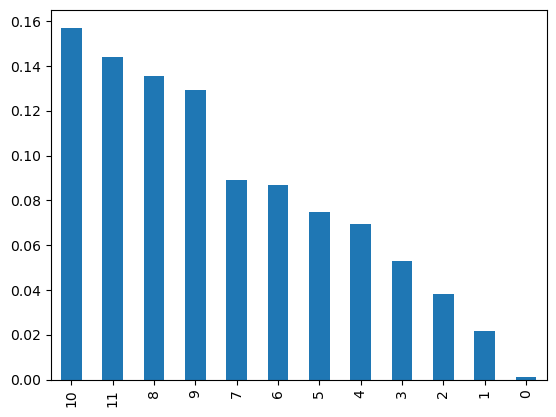

In [41]:
drop_off_details['Time diff'].value_counts(normalize=True).plot(kind='bar')

In [50]:

drop_off_incidents = drop_off_details['Incident'].value_counts()

Text(0, 0.5, 'Count')

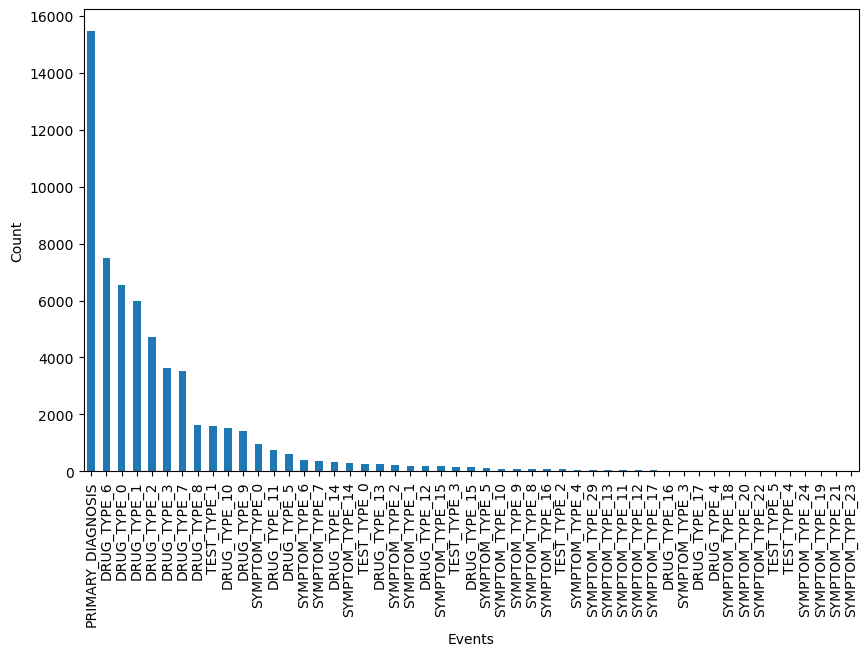

In [52]:
plt.figure(figsize = (10,6))
drop_off_incidents.plot(kind='bar')
plt.xlabel('Events')
plt.ylabel('Count')